## Topic: Plant Seedlings Classification

In our project, we are going to differentiate a weed from a crop seedling by using two keras. Through the projcet, we can do better for crop yields and better stewardship of the environment. 

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tqdm
import torch.nn as nn

import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
from glob import glob
import numpy as np
import math

import sklearn
import sklearn.preprocessing
import skimage
import skimage.io
import skimage.color
import seaborn as sns
import random
import tensorflow as tf
from torchvision import transforms
import torchvision
import torch

In [7]:
import keras
import glob

### 1. Get the Data for plant seedlings

The Aarhus University Signal Processing group and University of Southern Denmark have released a dataset containing images of approximately 960 unique plants which belongs to 12 species at several growth stages.

We obtained images and resized the image to 75 x 75 px. We use a 75 x 75 px size for a quicker training of model. There are 4750 images in total and have 12 different catagories for different plant species. 


In [15]:
ScaleTo = 75  # px to scale
seed = 7  # fixing random

To read images, we define a readImage method and change the foler route each time to show different catalory.

In [16]:
def readImage(path):

    files = glob(path)
    trainImg = []
    trainLabel = []
    j = 1
    num = len(files)

    # Obtain images and resizing, obtain labels
    for img in files:
        print(str(j) + "/" + str(num), end="\r")
        trainImg.append(cv2.resize(cv2.imread(img), (100, 100)))  # Get image (with resizing)
        trainLabel.append(img.split('/')[-2])  # Get image label (folder name)
        j += 1

    trainImg = np.asarray(trainImg)  # Train images set
    trainLabel = pd.DataFrame(trainLabel)  # Train labels set
    return trainImg

##### 1.1 BLACK-GRASS

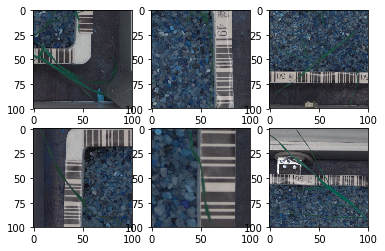

In [17]:
trainImg=readImage('train/Black-grass/*.png') 
# Show some example images for black-grass
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])

##### 1.2 CHARLOCK

Text(0.5, 1.0, 'charlock')

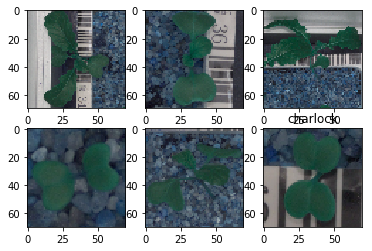

In [48]:
# Show some example images for charlock
trainImg=readImage('train/Charlock/*.png') 
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title("charlock")

##### 1.3 Cleavers

Text(0.5, 1.0, ' Cleavers')

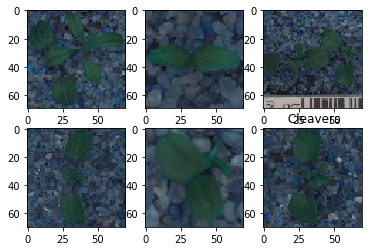

In [50]:
# Show some example images for Cleavers
trainImg=readImage('train/Cleavers/*.png') 
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title(" Cleavers")

##### 1.4 Common Chickweed

Text(0.5, 1.0, 'Common Chickweed')

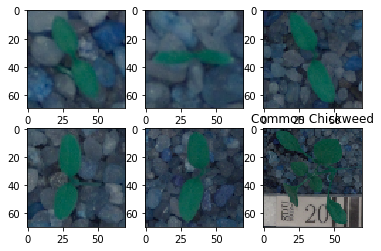

In [51]:
# Show some example images for Common Chickweed
trainImg=readImage('train/Common Chickweed/*.png') 
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title("Common Chickweed")

##### 1.5 Common wheat

Text(0.5, 1.0, ' Common wheat')

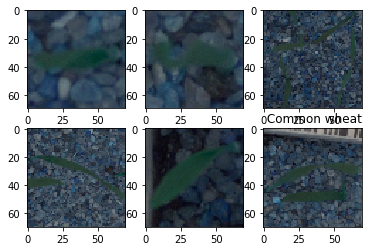

In [52]:
# Show some example images for Common wheat
trainImg=readImage('train/Common wheat/*.png')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title(" Common wheat")

##### 1.6 Fat Hen

Text(0.5, 1.0, 'Fat Hen')

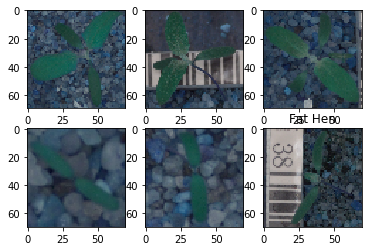

In [53]:
# Show some example images for Fat Hen
trainImg=readImage('train/Fat Hen/*.png')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title("Fat Hen")

##### 1.7 Loose Silky-bent

Text(0.5, 1.0, 'Loose Silky-bent')

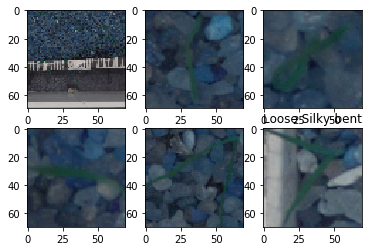

In [54]:
# Show some example images for Loose Silky-bent
trainImg=readImage('train/Loose Silky-bent/*.png')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title("Loose Silky-bent")

##### 1.8 Maize

Text(0.5, 1.0, ' Maize')

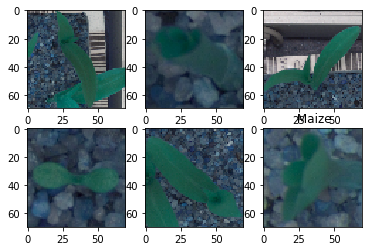

In [55]:
# Show some example images for Maize
trainImg=readImage('train/Maize/*.png')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title(" Maize")

##### 1.9 Scentless Mayweed

Text(0.5, 1.0, 'Scentless Mayweed')

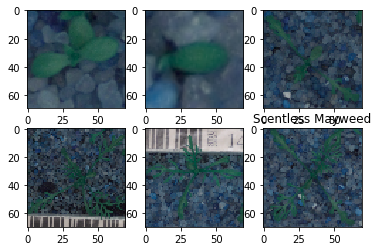

In [56]:
# Show some example images for Scentless Mayweed
trainImg=readImage('train/Scentless Mayweed/*.png')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title("Scentless Mayweed")

##### 1.10 Shepherds Purse

Text(0.5, 1.0, 'Shepherds Purse')

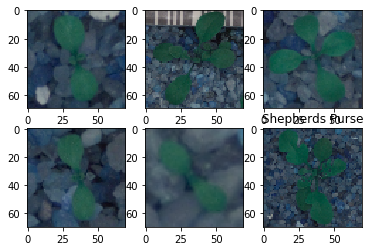

In [57]:
# Show some example images for Shepherds Purse
trainImg=readImage('train/Shepherds Purse/*.png')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title("Shepherds Purse")

##### 1.11 Small-flowered Cranesbill

Text(0.5, 1.0, 'Small-flowered Cranesbill')

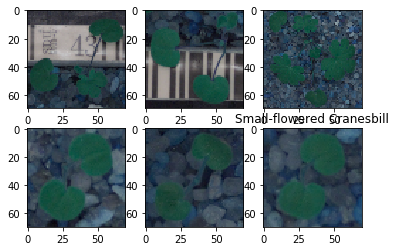

In [58]:
# Show some example images for Small-flowered Cranesbill
trainImg=readImage('train/Small-flowered Cranesbill/*.png')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title("Small-flowered Cranesbill")

##### 1.12 Sugar beet

Text(0.5, 1.0, 'Sugar beet')

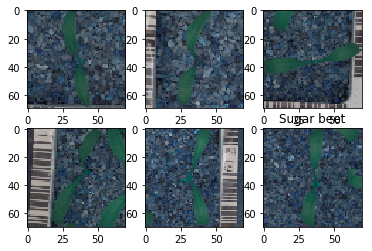

In [59]:
# Show some example images for Sugar beet
trainImg=readImage('train/Sugar beet/*.png')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainImg[i])
title("Sugar beet")

From these 12 different catagories, we found that every photo of plant seedling has an background, so we are going to move it. It'll help us to gain better model accuracy without the background.

code from https://www.kaggle.com/nikkonst/plant-seedlings-with-cnn-and-image-processing To help us load data

In [1]:
import cv2
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

ScaleTo = 70  # px to scale
seed = 7  # fixing random

path = 'train/*/*.png' 
files = glob(path)

trainImg = []
trainLabel = []
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (ScaleTo, ScaleTo)))  # Get image (with resizing)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name)
    j += 1
trainLabellist = trainLabel
trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

## 2. Prepare image

Remove background of the image:
- Gausian blur
- Convert to HSV
- Mask
- Boolean mask

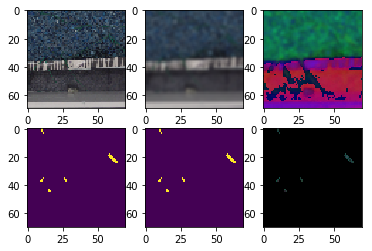

In [2]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

In [3]:
trainImg.shape

(4750, 70, 70, 3)

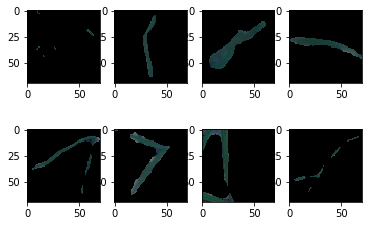

In [5]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])

In [8]:
trainImg = clearTrainImg / 255

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


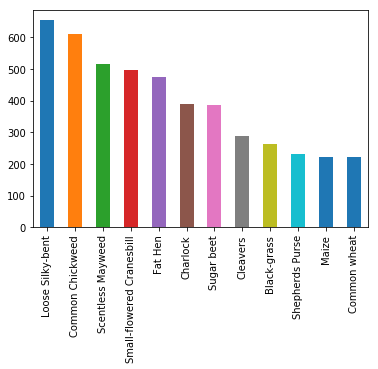

In [9]:
from keras.utils import np_utils
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainLabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainLabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainLabel[0].value_counts().plot(kind='bar')

In [60]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(trainImg, clearTrainLabel, 
                                                test_size=0.1, random_state=seed, 
                                                stratify = clearTrainLabel)

## 3. First Verion by using Keras

In [71]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(trainX)

In [72]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

In [14]:
numpy.random.seed(seed)  # Fix seed

my_model = Sequential()

my_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(ScaleTo, ScaleTo, 3), activation='relu'))

my_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
my_model.add(Flatten())
my_model.add(Dense(num_clases, activation='softmax'))

my_model.summary()

# compile model
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 278784)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3345420   
Total params: 3,384,140
Trainable params: 3,384,140
Non-trainable params: 0
_________________________________________________________________


In [15]:
my_history = my_model.fit_generator(datagen.flow(trainX, trainY, batch_size=75), 
                           epochs=35, validation_data=(testX, testY), 
                           steps_per_epoch=trainX.shape[0])

Epoch 1/35
4275/4275 [==============================] - 286s 67ms/step - loss: 0.9319 - acc: 0.6955 - val_loss: 0.5746 - val_acc: 0.8126
Epoch 2/35
4275/4275 [==============================] - 275s 64ms/step - loss: 0.4612 - acc: 0.8511 - val_loss: 0.3758 - val_acc: 0.8947
Epoch 3/35
4275/4275 [==============================] - 277s 65ms/step - loss: 0.3642 - acc: 0.8801 - val_loss: 0.3384 - val_acc: 0.9074
Epoch 4/35
4275/4275 [==============================] - 276s 65ms/step - loss: 0.3143 - acc: 0.8963 - val_loss: 0.3528 - val_acc: 0.8905
Epoch 5/35
4275/4275 [==============================] - 276s 65ms/step - loss: 0.2794 - acc: 0.9081 - val_loss: 0.3663 - val_acc: 0.8947
Epoch 6/35
4275/4275 [==============================] - 276s 65ms/step - loss: 0.2540 - acc: 0.9161 - val_loss: 0.3483 - val_acc: 0.9158
Epoch 7/35
4275/4275 [==============================] - 276s 65ms/step - loss: 0.2354 - acc: 0.9225 - val_loss: 0.3886 - val_acc: 0.8884
Epoch 8/35
4275/4275 [===================

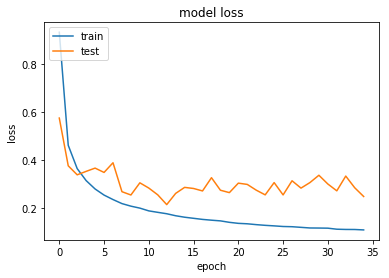

In [21]:
# summarize history for loss
plt.plot(my_history.history['loss'])
plt.plot(my_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

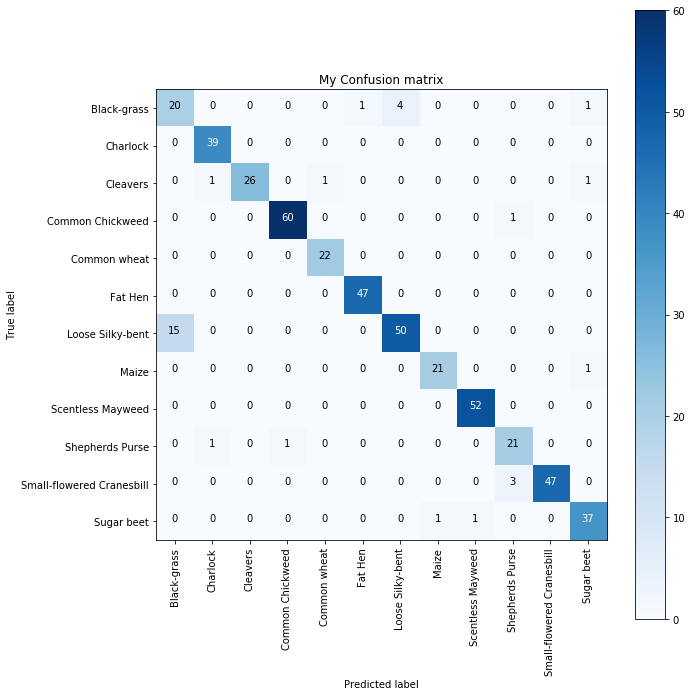

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='My Confusion matrix',
                          cmap=plt.cm.Blues):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = my_model.predict(testX)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(testY, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = le.classes_) 

## 4. Improved version 

In [16]:
numpy.random.seed(seed)  # Fix seed

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(ScaleTo, ScaleTo, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_clases, activation='softmax'))

model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 128)       204928    
__________

In [17]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001)

In [18]:
history = model.fit_generator(datagen.flow(trainX, trainY, batch_size=75), 
                           epochs=35, validation_data=(testX, testY), 
                           steps_per_epoch=trainX.shape[0], callbacks=[learning_rate_reduction])

Epoch 1/35
4275/4275 [==============================] - 535s 125ms/step - loss: 0.4411 - acc: 0.8508 - val_loss: 0.4733 - val_acc: 0.8400
Epoch 2/35
4275/4275 [==============================] - 521s 122ms/step - loss: 0.1371 - acc: 0.9501 - val_loss: 1.0524 - val_acc: 0.7747
Epoch 3/35
4275/4275 [==============================] - 523s 122ms/step - loss: 0.0818 - acc: 0.9710 - val_loss: 0.3518 - val_acc: 0.8989
Epoch 4/35
4275/4275 [==============================] - 501s 117ms/step - loss: 0.0539 - acc: 0.9818 - val_loss: 0.2852 - val_acc: 0.9305
Epoch 5/35
4275/4275 [==============================] - 500s 117ms/step - loss: 0.0383 - acc: 0.9873 - val_loss: 0.3933 - val_acc: 0.8842
Epoch 6/35
4275/4275 [==============================] - 500s 117ms/step - loss: 0.0312 - acc: 0.9899 - val_loss: 0.3480 - val_acc: 0.9326
Epoch 7/35
4275/4275 [==============================] - 500s 117ms/step - loss: 0.0253 - acc: 0.9918 - val_loss: 0.3673 - val_acc: 0.9347
Epoch 8/35
4275/4275 [============

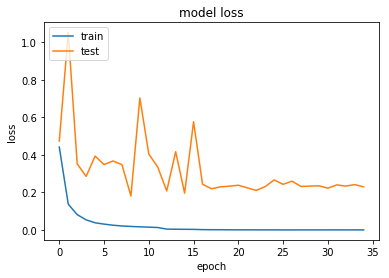

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

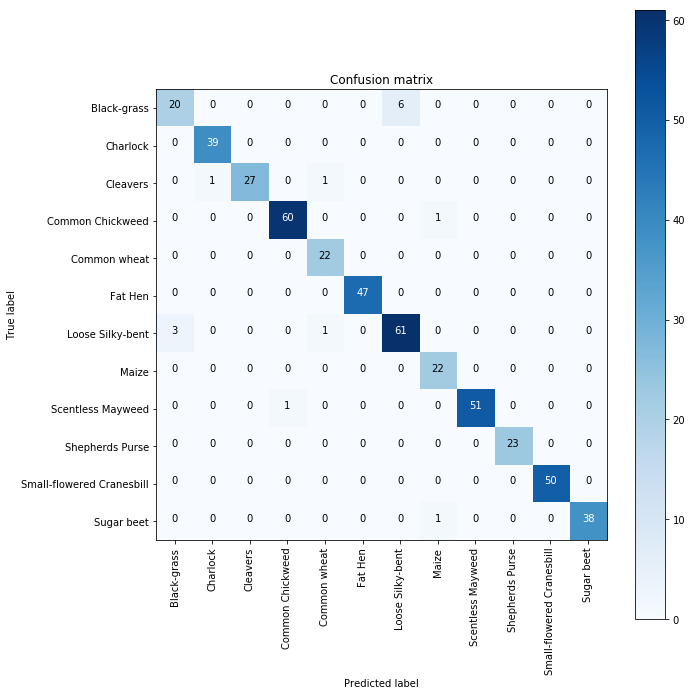

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model.predict(testX)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(testY, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = le.classes_) 

In [20]:
model.save('currentBest.h5')